In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from pandas import DataFrame
import tensorflow as tf
import warnings
warnings.filterwarnings('ignore')

In [2]:
master_ranked_games = pd.read_csv('Master_Ranked_Games.csv')

In [3]:
master_ranked_games.head()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
0,4227123625,1429,0,1,1,0,0,0,0,0,...,45,53831,41991,609,64,12.8,127,4,12916,26338
1,4219545724,1313,0,0,1,0,0,0,0,0,...,43,52924,39672,510,63,12.6,133,4,12252,29828
2,4219463634,1660,1,0,0,1,1,1,1,1,...,22,61745,46516,630,65,13.0,153,2,17005,37066
3,4205778093,984,1,1,1,0,1,0,2,0,...,5,25007,21444,304,41,8.2,51,1,10499,3085
4,4201063474,1437,0,1,1,0,1,0,2,0,...,39,71794,45798,565,68,13.6,150,7,47523,47150


# Armando una Redes Neuronales para comprobar importancia de factor Macro y Micro Game

En el data set que tenemos anteriormente tenemos datos de 100,000 partidas de LoL en la categoría master games. Para esto queremos comprobar que nos ayuda más a ganar una partida si el Macro Game o el Micro Game. 
Macro game lo definimos como toma de objetivos generales del juego (torres, dragones, barones y farmeo) mientras que Micro game lo definimos como objetivos individuales (Asesinatos y Asistencias) 
Dentro de este proceso no contaremos las estadísticas que representan un acumulado como oro total o damage total ya que esto es un acumulado de los dos factores.

# Primer acecamiento al data set

In [4]:
master_ranked_games.describe()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,1.071250e+05,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,...,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000,107125.000000
mean,4.159074e+09,1432.977914,0.495132,0.507025,0.513410,0.236229,0.408047,0.387715,1.359356,0.297018,...,39.807365,68789.821620,47875.980285,501.132966,64.695561,12.939112,125.359683,5.688831,24547.786763,36884.671888
std,1.029108e+08,436.506952,0.499979,0.499953,0.499822,0.424766,0.491474,0.487231,1.256974,0.535069,...,28.805782,37648.964189,16455.077811,180.010409,15.166821,3.033364,66.746287,3.640699,15510.255865,27034.549770
min,3.163679e+09,190.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.129344e+09,1121.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19.000000,40494.000000,36127.000000,382.000000,55.000000,11.000000,84.000000,3.000000,13297.000000,12583.000000
50%,4.189629e+09,1420.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,35.000000,63885.000000,47955.000000,517.000000,66.000000,13.200000,128.000000,5.000000,21455.000000,32486.000000
75%,4.222893e+09,1735.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,...,53.000000,90554.000000,59133.000000,627.000000,75.000000,15.000000,171.000000,8.000000,32367.000000,57346.000000
max,4.257322e+09,3758.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000,4.000000,...,225.000000,341957.000000,141692.000000,1338.000000,145.000000,29.000000,488.000000,29.000000,188817.000000,191193.000000


Haciendo un pequeño describe para obtener estadísticas básicas vemos que GameID no nos sirve para nada más que como identificador. Ahora en GameDuraton es la duración de las partidas en segundos. En LoL como en todos los jeugos online y multiplayer existen los AFK'S. Estos son los jugadores que entran a la partida y por cualquiera razón no participan en la misma. Por lo cual existe la opción de rendirse sin ninguna penalización. Arriba del minuto 15 (900 segundos) ya existe la opción de rendirse por no perder en el tiempo en una partida que ya está perdida o solo por estar desconforme con el redimiento del equipo 

In [5]:
master_ranked_games.shape

(107125, 50)

Este es el numéro de observaciones y de columnas que tenemos por lo tanto vamos a seguir realizando el filtro y 

# Primera Adaptación (Partidas Arriba de 15 min)

In [6]:
master_ranked_games_playes = master_ranked_games.query('gameDuraton >= 900')

In [7]:
master_ranked_games_playes.describe()

,gameId,gameDuraton,blueWins,blueFirstBlood,blueFirstTower,blueFirstBaron,blueFirstDragon,blueFirstInhibitor,blueDragonKills,blueBaronKills,...,redAssist,redChampionDamageDealt,redTotalGold,redTotalMinionKills,redTotalLevel,redAvgLevel,redJungleMinionKills,redKillingSpree,redTotalHeal,redObjectDamageDealt
count,9.894700e+04,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.00000,98947.000000,98947.000000,98947.000000,...,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000,98947.000000
mean,4.159087e+09,1496.787209,0.493729,0.507686,0.519753,0.255228,0.42263,0.387510,1.447108,0.321041,...,41.225161,72211.149858,49700.881017,527.691006,66.711492,13.342298,132.998787,5.890285,25948.999303,38973.659767
std,1.025309e+08,385.802500,0.499963,0.499943,0.499612,0.435991,0.49398,0.487184,1.258320,0.549436,...,28.329026,36449.786586,15154.932182,158.023930,12.921170,2.584234,63.129798,3.565675,15203.565740,26782.871165
min,3.163679e+09,900.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.000000,7793.000000,12607.000000,25.000000,25.000000,5.000000,0.000000,0.000000,177.000000,0.000000
25%,4.129516e+09,1207.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,21.000000,44171.000000,38238.000000,419.000000,57.000000,11.400000,94.000000,3.000000,14836.000000,15129.000000
50%,4.189360e+09,1466.000000,0.000000,1.000000,1.000000,0.000000,0.00000,0.000000,1.000000,0.000000,...,36.000000,66800.000000,49415.000000,533.000000,67.000000,13.400000,134.000000,5.000000,22755.000000,35513.000000
75%,4.222728e+09,1762.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,2.000000,1.000000,...,54.000000,93025.000000,59988.000000,636.000000,76.000000,15.200000,175.000000,8.000000,33455.000000,59344.000000
max,4.257322e+09,3758.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,7.000000,4.000000,...,225.000000,341957.000000,141692.000000,1338.000000,145.000000,29.000000,488.000000,29.000000,188817.000000,191193.000000


Como podemos ver ya logramos que nuestras duraciones de las partidas sean mayores a 15 minutos (900 segundos) por lo cual considero que ya podemos hacer un análisis sobre este tiempo de partidas

In [8]:
master_ranked_games_playes.shape

(98947, 50)

In [9]:
obs_perdidas = 107125 - 98947

In [10]:
print('Observaciones Perdidas:', obs_perdidas)

Observaciones Perdidas: 8178


Haciendo este filtro perdimos 8179 observaciones lo cual es bastante poco, considerando que todavia contamos con 98947 observaciones para nuestro proceso

# Creando Data sets a utilizar (Micro y Macro)

## Micro Data Set

In [11]:
master_ranked_games_playes.columns

Index(['gameId', 'gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt'],
    

In [12]:
micro_dataset = master_ranked_games_playes[['blueWins', 'blueFirstBlood','blueKills','blueDeath','blueAssist',
                                           'blueKillingSpree','redWins','redFirstBlood','redKills','redDeath',
                                           'redAssist','redKillingSpree']]

In [13]:
micro_dataset.head(5)

,blueWins,blueFirstBlood,blueKills,blueDeath,blueAssist,blueKillingSpree,redWins,redFirstBlood,redKills,redDeath,redAssist,redKillingSpree
0,0,1,7,19,13,2,1,0,19,7,45,4
1,0,0,6,22,9,1,1,1,22,6,43,4
2,1,0,30,13,61,7,0,1,13,30,22,2
3,1,1,26,3,34,6,0,0,3,26,5,1
4,0,1,19,24,22,5,1,0,23,19,39,7


Para entender un poco más este data set explicaremos que significa cada columna para un mejor entendimiento

* Wins = Que equipo ganó la partida 
* FirstBlood = Que equipo realizo el primer asesinato 
* Kills = Total de asesinatos por equipo 
* Deat = total de muertes por equipo 
* Assists = total de asistencias por equipo 
* KillingSpree = total de asesinatos multiples por equipo

###  Visuaización de los Datos para Micro 

<AxesSubplot:>

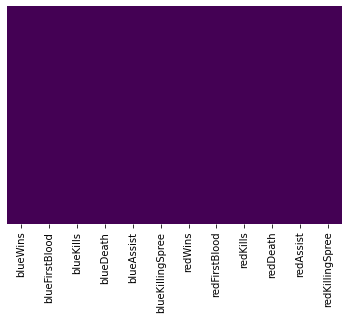

In [14]:
sns.heatmap(micro_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Este mapa que realizamos nos indica si existen valores nulos en las columnas, por lo cual no tenemos un colo amarillo que nos indica que tiene valores nulos. Por lo cual no tenemos que hacer ningun tipo de imputación

#### Visualación variables categoricas de Micro (Blue Wins, Red Wins, Firstbloods)

<AxesSubplot:xlabel='blueWins', ylabel='count'>

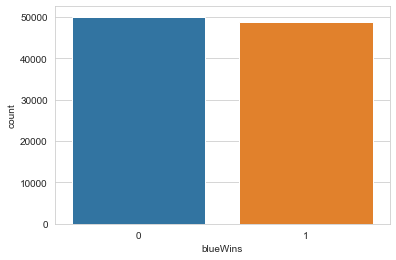

In [15]:
sns.set_style('whitegrid')
sns.countplot(x='blueWins', data = micro_dataset)

In [16]:
 micro_dataset.blueWins.value_counts()

0    50094
1    48853
Name: blueWins, dtype: int64

Como podemos ver aca la variable 1 significa que gano el equipo azul y cuando es 0 significa que ganó el equipo rojo por lo cual podriamos usar solo una columna de estas y estariamos identificando los dos casos. y vemos que estan bastante bien distribuidas

<AxesSubplot:xlabel='blueFirstBlood', ylabel='count'>

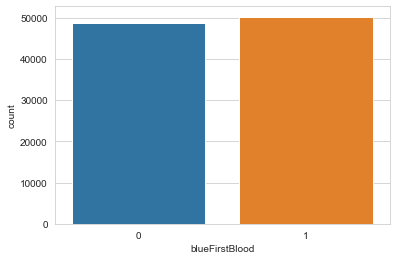

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='blueFirstBlood', data = micro_dataset)

In [18]:
 micro_dataset.blueFirstBlood.value_counts()

1    50234
0    48713
Name: blueFirstBlood, dtype: int64

En el mismo caso podemos identificarlo de la misma manera, 0 significa que el equipo rojo obtuvo la primera sangre y el 1 significa que el equipo azul consiguio la primera sangre. por lo cual podemos usar solo esta columna viendo que esta bastante bien distribuida

In [19]:
micro_dataset_1 = micro_dataset.drop(['redWins','redFirstBlood'], axis = 1)

In [20]:
micro_dataset_1.columns

Index(['blueWins', 'blueFirstBlood', 'blueKills', 'blueDeath', 'blueAssist',
       'blueKillingSpree', 'redKills', 'redDeath', 'redAssist',
       'redKillingSpree'],
      dtype='object')

#### Visualizando variables Numéricas

<AxesSubplot:xlabel='blueKills'>

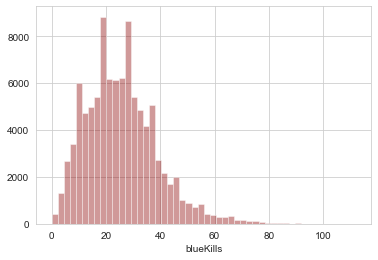

In [21]:
sns.distplot(micro_dataset_1.blueKills, kde=False, color='darkred')

Podemos ver en la variable blueKills que tiene una forma de distribución normal con un Skew hacia la derecha, este skew era de esperarse, ya que existen partida que se mata mucho, por lo cual no creo necesario hacer algún tipo de proceso en este caso

<AxesSubplot:xlabel='blueDeath'>

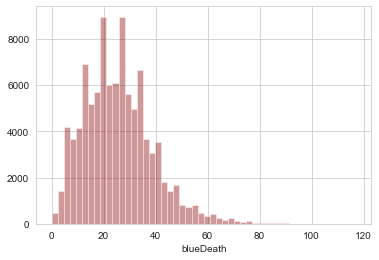

In [22]:
sns.distplot(micro_dataset_1.blueDeath, kde=False, color='darkred')

De la misma manera tenemos una distribución normal con otro pequeño skew a la derecha, por la misma razón que explicamos anteriormente suele pasar que los jugadores mueren más de la cuenta

<AxesSubplot:xlabel='blueAssist'>

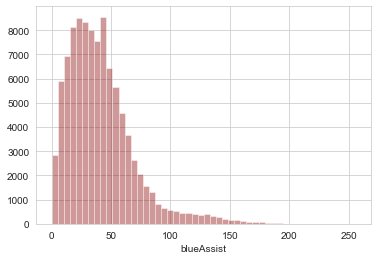

In [23]:
sns.distplot(micro_dataset_1.blueAssist, kde=False, color='darkred')

Ahora este si tiene un skew bastante marcado a la derecha y la distribución normal no es tan clara. Pero este se debe a que aveces algún asesinato tiene más de 1 asistente. Por lo cual no podemos quitarle este skew ya que es un dato que es muy real y posible

<AxesSubplot:xlabel='blueKillingSpree'>

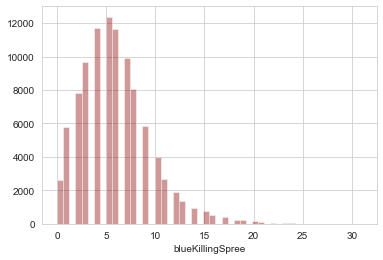

In [24]:
sns.distplot(micro_dataset_1.blueKillingSpree, kde=False, color='darkred')

Como podemos ver este caso al igual que las demas se comporta de una forma ciertamente normal, pero con este pequeño skew a la derecha, lo cual es normal y muy posible.

<AxesSubplot:xlabel='redKills'>

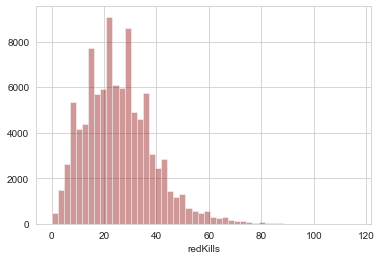

In [25]:
sns.distplot(micro_dataset_1.redKills, kde=False, color='darkred')

<AxesSubplot:xlabel='redDeath'>

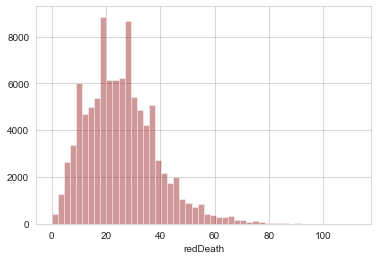

In [26]:
sns.distplot(micro_dataset_1.redDeath, kde=False, color='darkred')

<AxesSubplot:xlabel='redAssist'>

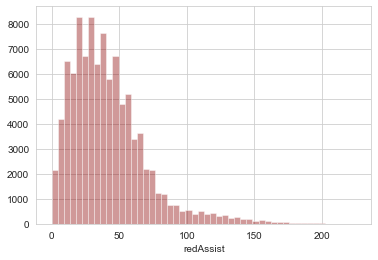

In [27]:
sns.distplot(micro_dataset_1.redAssist, kde=False, color='darkred')

<AxesSubplot:xlabel='redKillingSpree'>

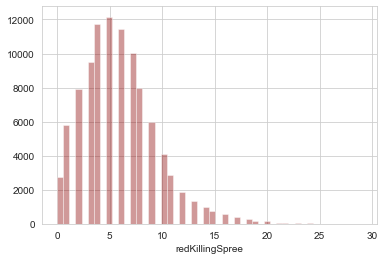

In [28]:
sns.distplot(micro_dataset_1.redKillingSpree, kde=False, color='darkred')

Como esperabamos en el caso de Red en todas las categorias se comporta de una manera bastanse similar

In [29]:
micro_dataset_1.head()

,blueWins,blueFirstBlood,blueKills,blueDeath,blueAssist,blueKillingSpree,redKills,redDeath,redAssist,redKillingSpree
0,0,1,7,19,13,2,19,7,45,4
1,0,0,6,22,9,1,22,6,43,4
2,1,0,30,13,61,7,13,30,22,2
3,1,1,26,3,34,6,3,26,5,1
4,0,1,19,24,22,5,23,19,39,7


Este sería el Dataset de micro con el cual trabajariamos y hariamos el preprocesamiento para armar nuestro modelo

#### Existe Correlación entre las variables?

<AxesSubplot:>

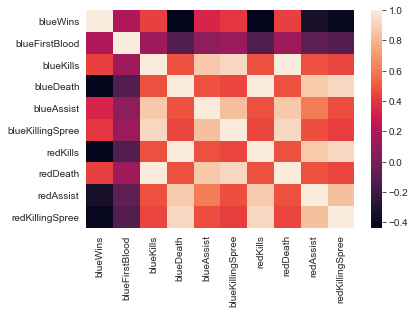

In [30]:
cor = micro_dataset_1.corr()
sns.heatmap(cor, xticklabels = cor.columns, yticklabels=cor.columns)

Donde tenemos algun tipo de correlación es en el total de RedKills con redDeaths lo cual explica lo mismo ya que si el equipo azul mata cierta cantidad esto sería totalmente proporcional a cuantas veces se murió el otro equipo. Por lo tanto tome la decisión de eliminar las variables de death para hacer mejor la regresión

In [31]:
micro_ds_final = micro_dataset_1.drop(['redDeath','blueDeath'],axis=1)

In [32]:
micro_ds_final.head()

,blueWins,blueFirstBlood,blueKills,blueAssist,blueKillingSpree,redKills,redAssist,redKillingSpree
0,0,1,7,13,2,19,45,4
1,0,0,6,9,1,22,43,4
2,1,0,30,61,7,13,22,2
3,1,1,26,34,6,3,5,1
4,0,1,19,22,5,23,39,7


<AxesSubplot:>

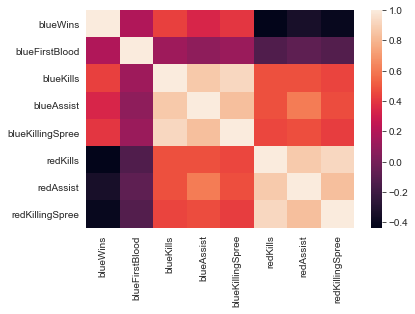

In [33]:
cor2 = micro_ds_final.corr()
sns.heatmap(cor2, xticklabels = cor2.columns, yticklabels=cor2.columns)

Ahora ya no tenemos una correlación tan fuerte, solo el único caso que tendría algun sentido es el de las asistencias, pero no llega a ser una correlación perfecta, por lo cual lo podemos usar.

## Macro DataSet

In [34]:
master_ranked_games_playes.columns

Index(['gameId', 'gameDuraton', 'blueWins', 'blueFirstBlood', 'blueFirstTower',
       'blueFirstBaron', 'blueFirstDragon', 'blueFirstInhibitor',
       'blueDragonKills', 'blueBaronKills', 'blueTowerKills',
       'blueInhibitorKills', 'blueWardPlaced', 'blueWardkills', 'blueKills',
       'blueDeath', 'blueAssist', 'blueChampionDamageDealt', 'blueTotalGold',
       'blueTotalMinionKills', 'blueTotalLevel', 'blueAvgLevel',
       'blueJungleMinionKills', 'blueKillingSpree', 'blueTotalHeal',
       'blueObjectDamageDealt', 'redWins', 'redFirstBlood', 'redFirstTower',
       'redFirstBaron', 'redFirstDragon', 'redFirstInhibitor',
       'redDragonKills', 'redBaronKills', 'redTowerKills', 'redInhibitorKills',
       'redWardPlaced', 'redWardkills', 'redKills', 'redDeath', 'redAssist',
       'redChampionDamageDealt', 'redTotalGold', 'redTotalMinionKills',
       'redTotalLevel', 'redAvgLevel', 'redJungleMinionKills',
       'redKillingSpree', 'redTotalHeal', 'redObjectDamageDealt'],
    

In [35]:
macro_dataset = master_ranked_games_playes[['blueWins','blueDragonKills','blueBaronKills','blueInhibitorKills',
                                            'blueTotalMinionKills','redDragonKills','redBaronKills','redInhibitorKills',
                                           'redTotalMinionKills']]

Para hacer una explicación rápida de las columnas que escogimos para este dataset

* Blue Wins: Repasamos que era si el equipo azul ganó como variable booleana
* DragonKills: cuantos dragones mataron los equipos 
* Inhibidor: cuando inhibitors derrotaron por equipo
* MinionKills: en combinado cuantos subditos derrotaron el equipo 
* BaronKills: cuantos barones derrotaron por equipo

### Visualización datos para Macro

<AxesSubplot:>

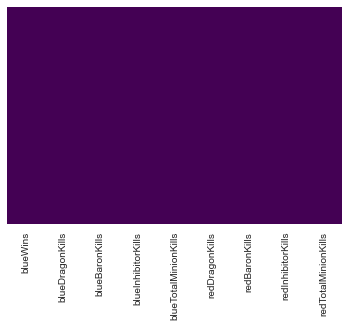

In [36]:
sns.heatmap(macro_dataset.isnull(),yticklabels=False,cbar=False,cmap='viridis')

No contamos con ningún Na en el data set por lo cual no tenemos que hacer ningún tipo de imputación

### Visualización para variable categorica de Micro(BlueWins)

<AxesSubplot:xlabel='blueWins', ylabel='count'>

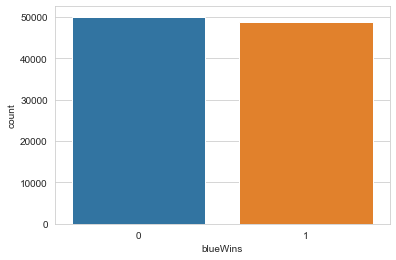

In [37]:
sns.set_style('whitegrid')
sns.countplot(x='blueWins', data = macro_dataset)

Podemos observar que esta bastante bien distribuida y podemos hacer un análsis bastante bueno 

<AxesSubplot:xlabel='blueDragonKills'>

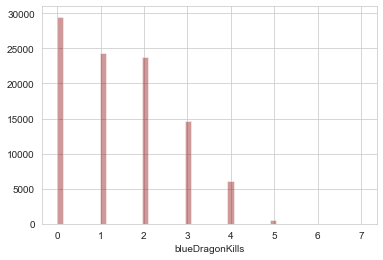

In [38]:
sns.distplot(macro_dataset.blueDragonKills, kde=False, color='darkred')

Esta variable se ve así ya que el Dragon solo puede ser asesinado 5 veces como máximo, llegar a este punto de la partida es complicado, por lo cual podemos ver una distribución un poco extraña pero tiene sentido

<AxesSubplot:xlabel='blueBaronKills'>

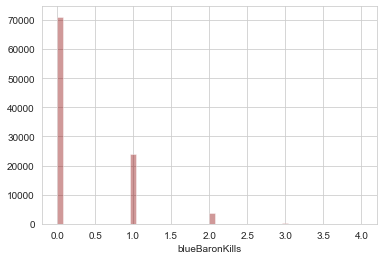

In [39]:
sns.distplot(macro_dataset.blueBaronKills, kde=False, color='darkred')

Al igual que los dragones, aunque el baron no tiene un límite de asesinatos es muy complicado hacer más de dos barones en una partida, ya que es un aspecto del macro grame muy condicionanete y complicado de realizar, por lo cual tiene sentido que se comporte de esta manera

<AxesSubplot:xlabel='blueInhibitorKills'>

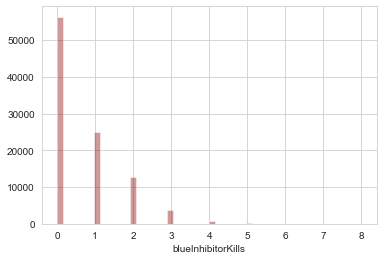

In [40]:
sns.distplot(macro_dataset.blueInhibitorKills, kde=False, color='darkred')

Los inhibidores son uno de los ultimos objetivos que derrotar para poder acceder a la base enemiga, en este solo existen tres inhibidores, pero derrotar solo uno es posible ganar la partida de esta manera. Estos pueden volver a salir, por lo cual tenemos algunas observaciones en 4 y en 5. Tiene muchos entido como se comportan los datos

<AxesSubplot:xlabel='blueTotalMinionKills'>

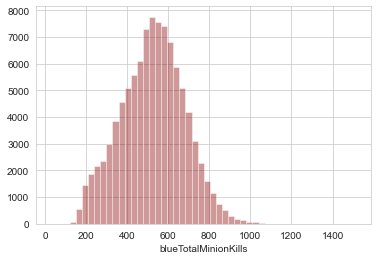

In [41]:
sns.distplot(macro_dataset.blueTotalMinionKills, kde=False, color='darkred')

Aqui tenemos una distribución normal bastante buena, lo cual nos da un visto bueno a que podamos trabajar con esta variable y tiene un comportamiento esperado

<AxesSubplot:xlabel='redDragonKills'>

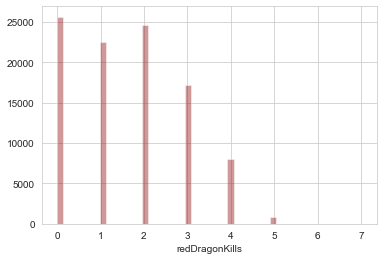

In [42]:
sns.distplot(macro_dataset.redDragonKills, kde=False, color='darkred')

<AxesSubplot:xlabel='redBaronKills'>

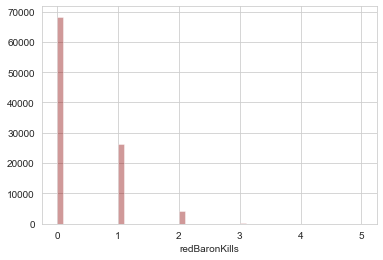

In [43]:
sns.distplot(macro_dataset.redBaronKills, kde=False, color='darkred')

<AxesSubplot:xlabel='redInhibitorKills'>

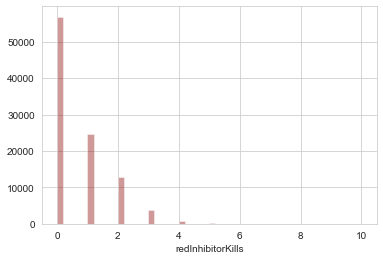

In [44]:
sns.distplot(macro_dataset.redInhibitorKills, kde=False, color='darkred')

<AxesSubplot:xlabel='redTotalMinionKills'>

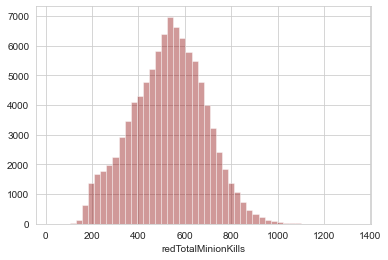

In [45]:
sns.distplot(macro_dataset.redTotalMinionKills, kde=False, color='darkred')

Como esperabamos las variables del lado de Red team no tienen diferencia con el compoertamiento de las del read team, por lo cual podemos seguir adelante con el proceso

<AxesSubplot:>

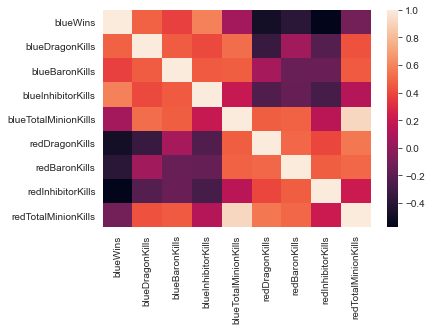

In [46]:
cor3 = macro_dataset.corr()
sns.heatmap(cor3, xticklabels = cor3.columns, yticklabels=cor3.columns)

Como podemos osbservar no tenemos una correlación lo suficientemente fuerte como para considerarlo un problema. por lo cual podemos seguir adelante con nuestro proceso y empezar con un preprocesamiento de datos

# Resumen Exploración de datos (Creación de Datasets)

Como resumen creamos dos datasets con los cuales vamos a trabajar los cuales son los siguientes 

In [47]:
micro_ds_final.head()

,blueWins,blueFirstBlood,blueKills,blueAssist,blueKillingSpree,redKills,redAssist,redKillingSpree
0,0,1,7,13,2,19,45,4
1,0,0,6,9,1,22,43,4
2,1,0,30,61,7,13,22,2
3,1,1,26,34,6,3,5,1
4,0,1,19,22,5,23,39,7


In [48]:
micro_ds_final.shape

(98947, 8)

In [49]:
macro_dataset.head()

,blueWins,blueDragonKills,blueBaronKills,blueInhibitorKills,blueTotalMinionKills,redDragonKills,redBaronKills,redInhibitorKills,redTotalMinionKills
0,0,0,0,0,646,3,0,0,609
1,0,0,0,0,563,2,0,0,510
2,1,1,1,2,651,2,0,0,630
3,1,2,0,0,402,0,0,0,304
4,0,2,0,0,528,1,0,0,565


In [50]:
macro_dataset.shape

(98947, 9)

# Creación de Red Neuronal Para Micro game Dataset

Ahora que tenemos nuestra primer acercamiento tenemos que definir nuestro modelo para esto debemos de tener separados nuestros data set dentro de X y Y para definir los batches de la primera capa de la capa

In [51]:
x_micro = micro_ds_final.drop(['blueWins'], axis = 1)
y_micro = micro_ds_final['blueWins']

In [52]:
print(x_micro.shape, y_micro.shape)

(98947, 7) (98947,)


In [53]:
x_train, x_test, y_train, y_test = train_test_split(x_micro, y_micro, test_size=0.30, random_state=42)

Ahora ya los tenemos separados por lo cual podemos emepezar a definir caracteristicas más profundas de nuestra red neuronal

Para este proceso vamos a usar el metodo secuencial, el cual sirve para poder agregar poco a pococ capas hasta que estemos satisfechos con el resultado

Para nuestro modelo estamos tratando de definir nuestra variable como una Boleeana, para esto crearemos una red que tenga dos funciones de activación: Relu y Sigmoide que entraremos a detelle más adelante. 
Recordemos que tenemos input variables de 7 por lo cual es un argumento que tenemos que especificar en nuestro codigo

In [54]:
model = Sequential()
model.add(Dense(7, input_dim=7, activation='relu'))
model.add(Dense(3, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

Para este proceso creemos que por ahora no necestaremos más que una capa de salida que entrada con la función de activación relu con 7 nodos, ya que tenemos 7 columnas y la capa escondida va tener la función de activación Relu nuevamente para que el output es 1 solo nodo que nos devuelva un valor entre 0 y 1 por eso usamos la función de activación sigmoide

## Explicando Función de Relu

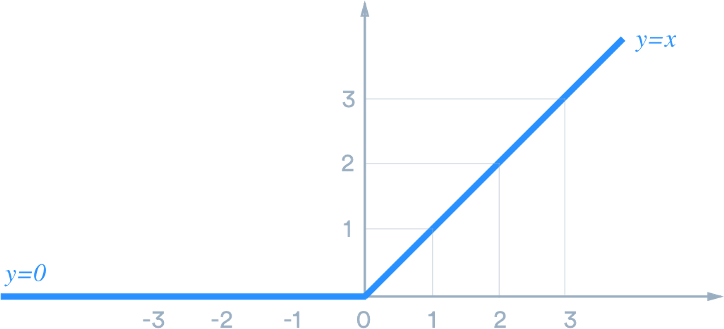

La función Relu lo que realiza esque toma los resultados de las operaciones de la red nueronal y hace una comparación. Por ejemplo, si el resultado de nuestra multiplicación es -0.1 Relu lo toma y le asigna un 0. Esto sera totalemente útil para nuestra red neuronal ya que estamos tratando de hacer predicción de 0's y 1's 

# Explicando Función de Sigmoide

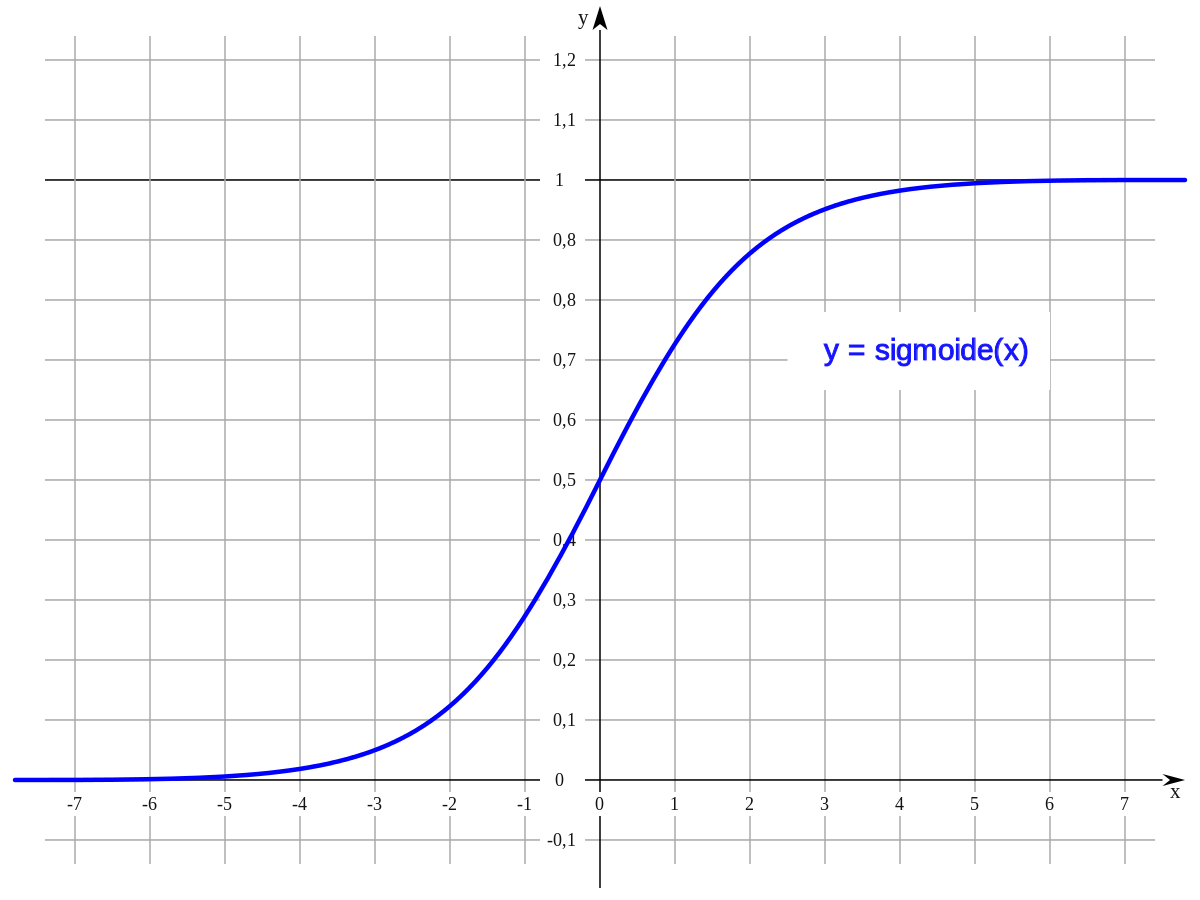

Esta es nuestra función de Sigmoide, que lo que trata de hacer es lograr hacer una linea de valores entre 0 y 1. Lo cual es justo lo que necesitamos como output. Ahora a esta se le puede indicar un treshold que en este caso usaramos 0.50 (default) por conveniencia

## Definiendo Nuestra función de costo

Este proceso no queda aca, recordamos que necesitamos evaluar el funcionamiento de nuestra red nueronal con una función de costo. En este caso como estamos en un problema de una variable booleana usaremos el método de Binary Cross-Entropy

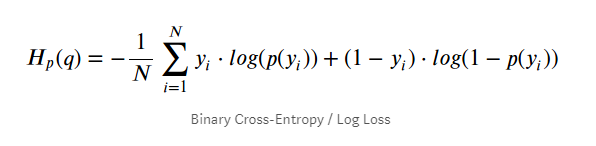

La función de Cross entropy lo que va hacer es calcular un puntaje que sea un "resumen" de la diferencia promedio entre lo que paso y lo que predijimos de la probablidad de predecir clase 1. Se minimiza el erro cuando es cercano a 0.

In [55]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Como función de optimización vamos a usar Adam y para que nos devuelva las metricas vamos a valuarlo con el método de accuracy para poder evaluar nuestros modelo y comprobar nuestr hipótesis

# Entrenando nuestra red neuronal para Micro

Para entrenar nuestra red neuronal debemos de tener en cuenta dos cosas los epochs son el numero de veces que el algoritmo va trabajar durante el dataset. 
Mientras que el batch size es el numero que define con el numero de observaciones a trabajar antes de pasar al siguiente nodo

In [69]:
model.fit(x_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
6927/6927 [==============================] - 13s 2ms/step - loss: 0.1405 - accuracy: 0.9423
Epoch 2/50
6927/6927 [==============================] - 11s 2ms/step - loss: 0.1407 - accuracy: 0.9420
Epoch 3/50
6927/6927 [==============================] - 13s 2ms/step - loss: 0.1399 - accuracy: 0.9427
Epoch 4/50
6927/6927 [==============================] - 9s 1ms/step - loss: 0.1403 - accuracy: 0.9425
Epoch 5/50
6927/6927 [==============================] - 9s 1ms/step - loss: 0.1403 - accuracy: 0.9429
Epoch 6/50
6927/6927 [==============================] - 13s 2ms/step - loss: 0.1401 - accuracy: 0.9427
Epoch 7/50
6927/6927 [==============================] - 11s 2ms/step - loss: 0.1400 - accuracy: 0.9427
Epoch 8/50
6927/6927 [==============================] - 10s 1ms/step - loss: 0.1399 - accuracy: 0.9427
Epoch 9/50
6927/6927 [==============================] - 15s 2ms/step - loss: 0.1400 - accuracy: 0.9428 0s - loss: 0.1
Epoch 10/50
6927/6927 [==============================] - 12s

Con este modelo en la ultima iteración que se realizo se tuvo un loss de 0.1387 y un accuaracy de 0.9429. Esto es bastante bueno, ya que es un buen modelo que logro ajustarse bien con la data de entrenamiento. Ahora haremos algunas predicción para ver como funciona con datos externos

In [70]:
predictions_microwins = model.predict_classes(x_test)

In [71]:
predictions_micro = DataFrame(predictions_microwins)
y_test_frame = DataFrame(y_test)

In [72]:
predictions_micro_renamed = predictions_micro.rename(columns = {0: 'blueWins'}, inplace = False)

In [73]:
predictions_micro_renamed.blueWins.value_counts()

0    15216
1    14469
Name: blueWins, dtype: int64

In [74]:
y_test_frame.blueWins.value_counts()

0    14990
1    14695
Name: blueWins, dtype: int64

In [75]:
acuaracy_micro = tf.keras.metrics.Accuracy()
acuaracy_micro.update_state(y_test, predictions_microwins)
acuaracy_micro.result().numpy()

0.9462355

Ya cuando nuestros datos de prueba logramos tener un accuaracy del 94.62% lo cual es un excelente numero. Ahora que nos esta diciendo esto en el contexto del problema

Dentro del contexto del problema nos esta diciendo que en un 94.62% aproximadamente los factores micro grame logran predecir de buena manera que equipo ganó la partida. Ahora haremos el mismo proceso anteriormente solo que con los factores de macro game y sin tanta explicación tan detallada ya que sera muy similar

# Creación de Red Neuronal para Macro Game

In [76]:
x_macro = macro_dataset.drop(['blueWins'], axis = 1)
y_macro = macro_dataset['blueWins']

In [77]:
print(x_macro.shape, y_macro.shape)

(98947, 8) (98947,)


Ahora tenemos la diferencia de que nuestra variable de input tiene 8 features, por lo cual debemos de modificar esto para que nuestra red entienda este proceso, por el contrario seguiremos usando el mismo modelo

In [78]:
x_trainm, x_testm, y_trainm, y_testm = train_test_split(x_macro, y_macro, test_size=0.30, random_state=42)

In [79]:
model2 = Sequential()
model2.add(Dense(8, input_dim=8, activation='relu'))
model2.add(Dense(4, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [80]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Como nos podemos dar cuenta nuestro modelo esta siendo armado de la misma manera con las mismas metricas solamente adaptandonos a nuestros nuevos datos

## Entrenando nuestra red neuronal para Macro Game

In [81]:
model2.fit(x_trainm, y_trainm, epochs=50, batch_size=10)

Epoch 1/50
6927/6927 [==============================] - 10s 1ms/step - loss: 3.9044 - accuracy: 0.6973
Epoch 2/50
6927/6927 [==============================] - 9s 1ms/step - loss: 0.2148 - accuracy: 0.9266
Epoch 3/50
6927/6927 [==============================] - 9s 1ms/step - loss: 0.1717 - accuracy: 0.9395
Epoch 4/50
6927/6927 [==============================] - 9s 1ms/step - loss: 0.1653 - accuracy: 0.9419
Epoch 5/50
6927/6927 [==============================] - 9s 1ms/step - loss: 0.1625 - accuracy: 0.9407
Epoch 6/50
6927/6927 [==============================] - 9s 1ms/step - loss: 0.1625 - accuracy: 0.9424
Epoch 7/50
6927/6927 [==============================] - 9s 1ms/step - loss: 0.1578 - accuracy: 0.9428
Epoch 8/50
6927/6927 [==============================] - 9s 1ms/step - loss: 0.1573 - accuracy: 0.9442
Epoch 9/50
6927/6927 [==============================] - 9s 1ms/step - loss: 0.1578 - accuracy: 0.9436
Epoch 10/50
6927/6927 [==============================] - 9s 1ms/step - loss: 0.15

Como podemos ver viendo los facotres de macro game logramos obtener un costo de 0.1244 lo cual es muy cercano a 0 y un accuaracy en el test set de 0.9495

In [82]:
predictions_macrowins = model2.predict_classes(x_testm)

In [83]:
predictions_macro = DataFrame(predictions_macrowins)
y_test_frame_m = DataFrame(y_testm)

In [84]:
predictions_macro_renamed = predictions_macro.rename(columns = {0: 'blueWins'}, inplace = False)

In [85]:
predictions_macro_renamed.blueWins.value_counts()

1    14975
0    14710
Name: blueWins, dtype: int64

In [86]:
y_test_frame_m.blueWins.value_counts()

0    14990
1    14695
Name: blueWins, dtype: int64

In [87]:
acuaracy_macro = tf.keras.metrics.Accuracy()
acuaracy_macro.update_state(y_testm, predictions_macrowins)
acuaracy_macro.result().numpy()

0.9492673

Como podemos ver con el test de prueba tambien notamos un accuaracy del 0.9492 porciento, lo cual es bastante bueno y logra crear un buen modelo

# Conclusiones

El objetivo de realizar este proyecto era comprobar la importancia de los factores Macro como Micro grame del juego. Como podemos resumir en dos puntos
* Accuracy score for micro test: 94.62%
* Accuracy score for macro test: 94.92%

Por lo cual numericamente podriamos decir que los factores macro son más importantes que los factores micro a la hora de condicionar una partida. Sin embargo, no existe una diferencía considerable entre los accuracy scores de los modelos. Por lo tanto podriamso concluir que son igual de importantes y que un jugador promedio de League of Legends deberia tener buen conocieminto de los dos factores del juego para condicionar partidas como los mejores jugadores del mundo

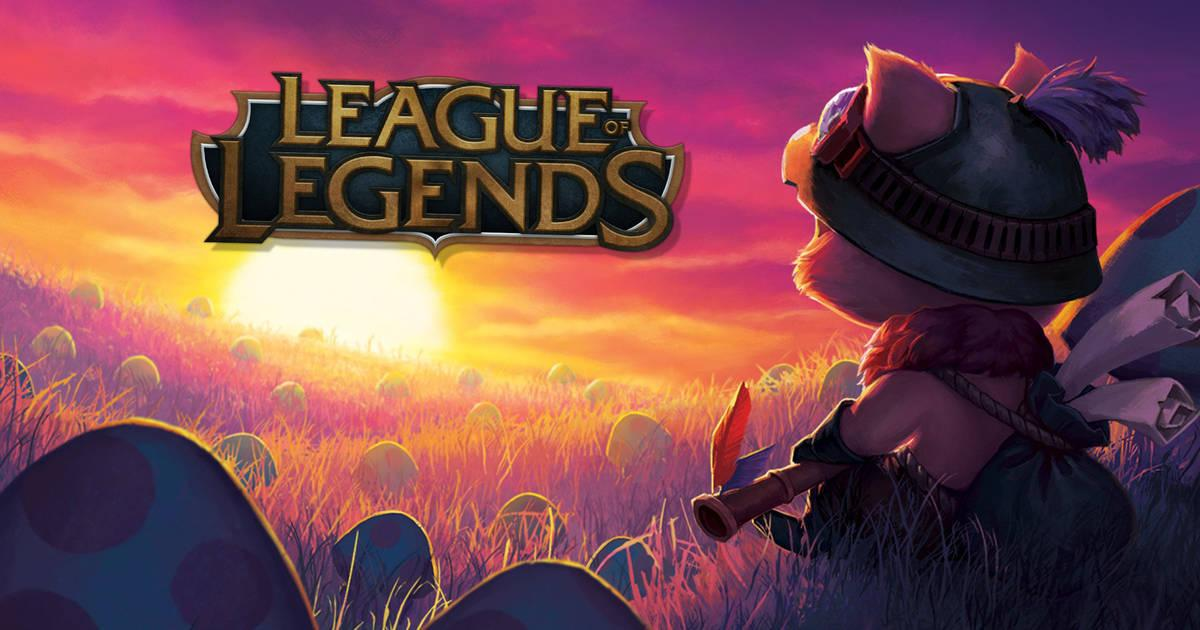